# 12.1 텐서플로

# 12.2 MNIST 데이터 가져오기
* 이미지 데이터 집합을 keras.datasets.mnist라는 경로를 통해서 읽어올 수 있다.
* 읽어 들인 데이터는 (이미, 레이블)의 묶음으로 되어있으며 훈련용 이미지와 레이블, 테스트용 이미지와 레이블로 읽어올 것이다.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
num = train_images[0]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]), end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

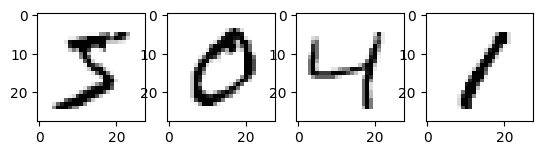

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')



* 출력 결과 훈련 이미지의 레이블이 5 0 4 1이라는 것을 확인할 수 있으며 이런 이미지와 정답이 6만 개 주어져 있으므로, 이러한 정보를 바탕으로 우리는 다음과 같은 일을 시도해 볼 것이다.
1. 신경망 모델의 입력값으로 사용하기에 적절한 형태로 train_images 데이터를 전처리
2. train_images 데이터를 학습시키기 위한 신경망 모델을 정의하는일
3. 신경망 모델의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법을 정의하는 일
4. 6만 개의 이미지로 이루어진 train_images 데이터를 심픙 신경망 모델에 넣어서 train_labels 데이터의 숫자로 인식하도록 학습을 시키기
5. 1만 개의 이미지로 이루어진 test_image 데이터를 학습을 마친 모델의 입력으로 넣어서 이 모데르이 정확도를 알아보는 일
6. 모델의 성능을 개선하기 위하여 모델의 신경망 노드망 층을 증가시키는 일

In [4]:
# 입력값 전처리: 0에서 1 사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 2차원 배열을 사용할 수 없기 때문에 1차원 객체로 변환
    keras.layers.Dense(256, activation='relu'), # 학습을 위한 연결을 밀집된 구조, 256개의 노드로 네트워크 구성
    keras.layers.Dense(10, activation='softmax') # 10개 중 하나의 category로 분류된다.
])

# 이렇게 생성된 신경망은 이전에 다룬 1) 경사 하강법을 이용하여 오차를 줄이는 방향으로 학습 진행 2) 오차 역전파를 이용하여 가장 좋은 가중치와 편향값을 찾음

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()
# 784개의 입력 중간에 256개의 은닉 노드 출력층에 10개의 노드
# 이 모델에서 학습시켜야할 파라미터의 수는 203,530 개라는 정보

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

# 12.5 인공 신경망을 학습시켜 보자
* 신경망의 학습은 기본적으로 추측을 한 뒤에 정답과 비교하여 오차가 얼마인지 확인한 뒤에 이 오차를 줄이는 방법으로 연결의 강도를 조절하는 것이다.
* 이때 오차를 측정하는 방법과 이 오차를 줄이는 방법을 지정해야 학습이 이루어질 수 있다.
* 3번 단계인 활성화 함수, 학습을 위한 최적화 함수, 손실 함수, 측정 방법을 정의하는 절차는 훈련을 하기 전에 필요한데 다음과 같은 설정을 하면 된다.

In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

* 모델이 완성되면 훈련 데이터오 ㅏ정답 데이터를 주고 학습을 실시하면 된다. 4번 단계인 학습을 시작하게 하는 함수는 모델의 fit() 메소드인데, 훈련용 입력과 여기에 대응하는 정답 레이블 데이터 셋을 차례로 주면 된다.
* 훈련 데이터 모음을 가지고 한 번 훈련을 실시하는 것을 에폭(epoch)이라고 부르는데, 이것을 반복함으로써 모델은 더 좋은 상태로 바뀌게 된다.
* 반복훈련은 이전 절에서 다룬 오차 역전파 알고리즘에 의해서 이루어지는데 이 모델은 오차 역전파에 의해서 오차를 줄여나가는 학습을 진행한다.
* 여기서는 5개의 에폭을 지정하였으므로 전체 데이터에 대한 학습을 5차례 실시하게 된다.

In [8]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8909 - loss: 0.3813
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0971
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0607
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0419
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0308


* 이제 5번 단계로 학습 데이터가 아닌 준비된 테스트 데이터를 이용하여 이 모델이 정답 레이블을 잘 맞히는지 확인해 보자.

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy:', test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9790 - loss: 0.0766

 Test accuracy: 0.9789999723434448


# 12.6 인공 신경망의 성능을 개선해 보자
* 6번 단계로 우리가 만든 인공 신경망의 선능을 조금 더 개선하는 방법에 대하여 알아보자.

*일반적으로는
  1. 학습을 위한 은닉층을 더 깊게 만들기
  2. 에폭을 증가시키기
  3. 많은 학습용 데이터를 사용하기
  4. 하이퍼파라미터 튜닝하기

* 이 절에서는 1번 방법인 학습을 위한 은닉층을 더 깊게 만들기 위하여 128개, 100개의 은닉층을 가지도록 신경망을 재구성하였다.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs = 5)


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6396 - loss: 1.0680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8942 - loss: 0.3459
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9282 - loss: 0.2422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9437 - loss: 0.1865
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9556 - loss: 0.1445
313/313 - 1s - 5ms/step - accuracy: 0.9589 - loss: 0.1366

 Test accuracy: 0.958899974822998


# 12.7 새 이미지를 잘 학습하는가 알아보자
* 학습 중에 표시되는 정보들은 지나치기 쉽지만 매우 유용한 정보들이 많다. 별도의 verbose 모드 설정이 없을 경우 학습 단계에서 다음과 같은 메시지를 보여주는데 이는 다음과 같다
1. 에폭의 진행도 현재에폭/전체 에폭
2. 배치의 개수
3. 에폭 수행에 걸린 시간
4. 손실값의 합
5. 현 에폭 단계에서 전체 훈련 데이터의 정확도
* 학습을 진행하는 이유는 이렇게 해서 얻은 모델을 새로운 데이터에 적용하기 위해서이다.
* 앞에서 훈현시킨 모델을 사용해 어떤 이미지든 분류해 보고 싶다.
* 가장 간단한 것은 이미 가지고 있는 test_images 배열에 있는 이미지들이다. 이 데이터의 형태를 출력해 보면 28X28 크기의 이미지 10,000개를 가진 3차원 배열이라는 의미이다.
* 이 중에 하나의 데이터를 무작위로 선택하고 random을 사용해서.
* randint() 함수로 임의의 인덱스를 만들어 해당 위치의 이미지를 가져와 화면에 그려 보자.


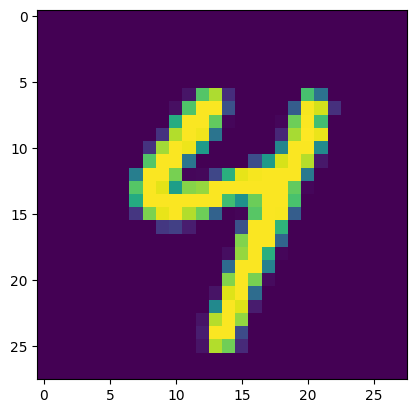

In [11]:
randIdx = np.random.randint(0, 6000)
plt.imshow(test_images[randIdx])

In [12]:
yhat = model.predict(test_images[randIdx])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

* 위에서 에러가 발생한 이유는 이전에 28X28 크기의 이미지가 여러 개 담길 수 있는 (None, 28, 28) 구조의 3차원 배열 입력을 처리하는 모델을 만들었는데, 여기는 2차원 배열이 입력으로 제공되었다는 것이다.
* newaxis라는 축을 하나 추가해주는 메소드를 이용하여 3차원 데이터로 만들자.
* 이를 predict() 메소드에 넣으면, 각각의 레이블과 일치하는 정도를 0에서 1사이의 확률값으로 출력한다. 이 값을 출력해보면 대부분 매우 작은 확률값을 가지는 것을 확인 할 수 있다.
* 이제 pred.argmax() 메소드로 이 활률값들 중 가장 큰 값을 살펴보면 노드 10개 중에서 가장 큰 출력을 갖는 노드는 4번 노드라는 것을 알 수 있다.


In [13]:
pred = model.predict(test_images[randIdx][np.newaxis, :, :])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


array([[1.7250258e-08, 2.1069479e-07, 1.2946890e-07, 3.5025597e-08,
        9.9687684e-01, 5.0828639e-05, 1.6472255e-07, 9.1239650e-05,
        3.7199634e-06, 2.9768508e-03]], dtype=float32)

In [14]:
pred.argmax()

4

# 12.8 소프트맥스 함수
* 가중치 값을 가진 벡터를 0에서 1 사이의 클래스별 확률값으로 변환하기 위해 사용하는 함수가 바로 소프트맥스 함수이다.


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.2)
print('Sahpe of x train: ', x_train.shape)
print('Sahpe of x test: ', x_test.shape)
print('Sahpe of y train: ', y_train.shape)
print('Sahpe of y test: ', y_test.shape)

Sahpe of x train:  (120, 4)
Sahpe of x test:  (30, 4)
Sahpe of y train:  (120,)
Sahpe of y test:  (30,)


In [18]:
from tensorflow import keras

# 순차 모델을 생성하자
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30, batch_size=5, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3567 - loss: 2.0123
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 1.2161     
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 1.0574     
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6393 - loss: 0.9297 
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.8717 
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 0.7871 
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.7528 
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9130 - loss: 0.6613 
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.6205 
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 0.5940 
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.5685
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.908

In [19]:
print('model evaluation: ')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('Data classification accuracy:', eval_acc)

model evaluation: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9333 - loss: 0.3098
Data classification accuracy: 0.9333333373069763


# 12.12 분류의 정확도를 높이기 위한 층을 추가하자
* 분류 정확도를 높이기 위한 층을 추가하자
* 그리고 학습의 과정에서 손실값과 정확도가 어떻게 변하는지를 관찰하기 위하여 model.fit() 함수의 반환값을 hist라는 변수에 저장하여보자.

In [21]:
# 순차 모델을 생성하자
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'), # new layer
    keras.layers.Dense(3, activation='softmax')
])


# Model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train,y_train,epochs=30, batch_size=5, verbose=0)

# Evaluation
print('model evaluation: ')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('Data classification accuracy:', eval_acc)

model evaluation: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9000 - loss: 0.1542
Data classification accuracy: 0.8999999761581421


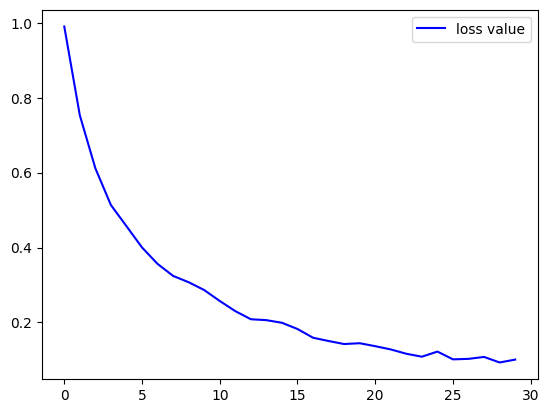

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()


# 12.13 학습한 모델을 저장하고 불러오자
* 이전 절의 내용을 요약하면 60개의 노드가 있는 하나의 은닉층을 이용하여 분류하는 것보다 60, 30개의 노드를 가진 두 개의 은닉층을 가진 신경망을 이용하여 붓꽃을 분류하는 신경망 중에서 후자가 더 나은 분류 정확도를 보인다.
* 지금까지 만든 모델을 저장하여 다시 사용하는 방법이 있다. 이는 save() 메소드를 사용하면 된다.

In [23]:
# h5 파일은 HDF(Hierarchical Data Format)로 저장된 데이터 파일을 말함.
model.save('./iris_model.h5')

In [24]:
!ls -l

total 64
-rw-r--r-- 1 root root 60136 Feb  2 07:34 iris_model.h5
drwxr-xr-x 1 root root  4096 Jan 30 14:19 sample_data


In [26]:
# 저장된 모델을 불러와서 사용하는 방법은 keras.models 모듈의 load_model() 함수를 사용하면 된다.
loaded = keras.models.load_model('/content/iris_model.h5')
loaded.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 60)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225 (8.70 KB)

 Trainable params: 2,223 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)